# Making a Single Node NN

Chapter 10 Linear discrimination 

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=568&h=303)

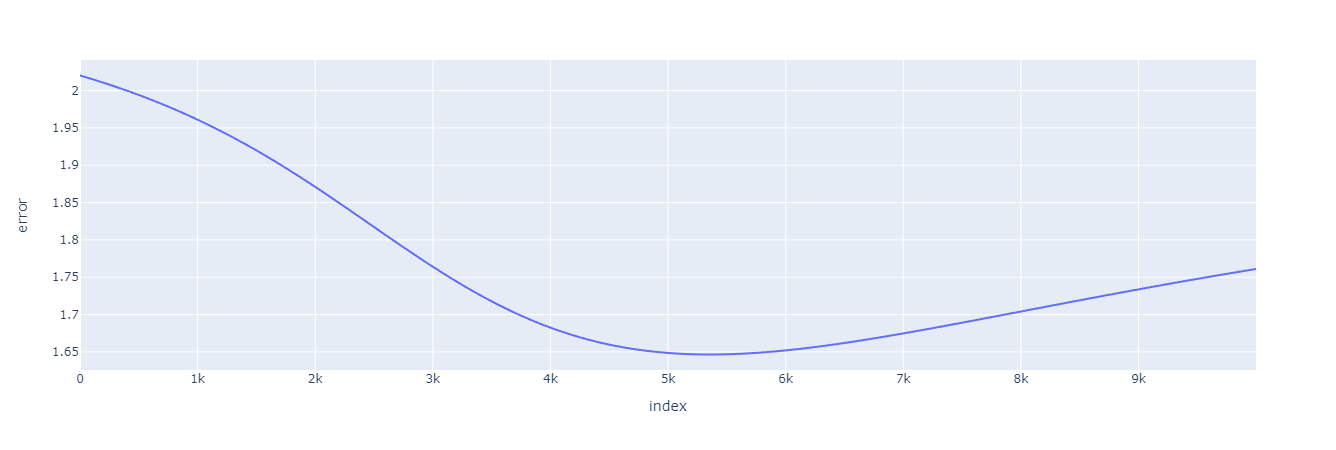

   index     error
0      0  2.020201
1      1  2.020155
2      2  2.020109
3      3  2.020062
4      4  2.020016
[0.94732416]


In [2]:
import numpy as np
import math
import plotly.express as px
import pandas as pd

class singleNode:
    def __init__(self):
        self.w = 2 * np.random.random((3,1)) -1
        
    def sigmoid(self, gx):
        return 1/(1+math.e**(-gx))
    
    def sigmoid_derivitive(y_pred):
        return y_pred * (1- y_pred)
    
    def forward_pass(self, x):
        return self.sigmoid(np.dot(x,self.w))
        
    def back_prop(self, x, y, num_iterations, step):
        error_history = []
        for iterations in range(num_iterations):
            y_pred = self.forward_pass(x)
            error = abs(y-y_pred)
            error_history.append(sum(error)[0])
            derivative =  y_pred * (1- y_pred)
            adjustment = np.dot(y_pred.T,error*derivative)
            self.w += adjustment*step
        return error_history

nn = singleNode()

train_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]]) 
train_outputs = np.array([[0, 1, 1, 0]]).T 
error = nn.back_prop(train_inputs, train_outputs, 10000, .001)


# creating the dataframe 
df = pd.DataFrame(error) 
df = df.reset_index()
df = df.rename({'index': 'index', 0: 'error'}, axis='columns')
fig = px.line(df, x='index', y='error')
fig.show()
print(df.head())
print(nn.forward_pass(np.array([0, 1, 1])))
        
        
        
        
        
        